In [1]:
import scipy.io
import pandas as pd
import numpy as np 
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_auc_score
import scipy.stats as stats
from mat_preproc import preproc

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set_style("darkgrid")

In [2]:
# the mat file is generated by CRM_SN_vs_MN_imbalLDA_1450ms_order_proj.m

#Load in the MATLAB file with all the data
data = scipy.io.loadmat('data_CRM_SN_vs_MN_imbalLDA_order_proj_1.mat')
# data = scipy.io.loadmat('data_CRM_SN_vs_MN_imbalLDA_order_proj_2.mat')

print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'user_class_min_1', 'user_feat_1', 'user_prob_1', 'user_resp_1', 'user_source_1', 'user_tr_order_1', 'user_train_prob_1', 'user_weights_1'])


In [3]:
#Had to index them like this because there was an unnecessary dimension 

# user trail order
tr_order = data['user_tr_order_1'][0]

# projection scores
proj_score = data['user_prob_1'][0]

# source and response label
source_label = data['user_source_1'][0]
resp_label = data['user_resp_1'][0]

# features, group the channels and average over the windows,
# those are called features, and we use the features for training
behav_feat = data['user_feat_1'][0]

# Encodings for Each Label

## *source information*

1. SC (Source Correct)
2. CR (Correct Rejection)
3. SI (Source Incorrect)
4. Miss 
5. FA  (False Alarm)

## *label for the source response*

1. RS (Remember Source)
2. RO (Remember Other)
3. F (Familiarity)
4. MN (Maybe New) 
5. SN (Sure New)


In [4]:
# class attributes
source_info = ["SC", "CR", "SI", "M", "FA"]
response_info = ["RS", "RO", "F", "MN", "SN"]

# the x-axis on the projection graph
x_axis = [(1, 1), (3, 1), (5, 1), (1, 2), (5, 2), (1, 3), (3, 3), (5, 3), (4, 4), (2, 4), (4, 5), (2, 5)]

In [5]:
for source, resp in x_axis:
    print(f"{source_info[source-1]}-{response_info[resp-1]}")

SC-RS
SI-RS
FA-RS
SC-RO
FA-RO
SC-F
SI-F
FA-F
M-MN
CR-MN
M-SN
CR-SN


# trainning - CRSN vs. CRMN whole dataset

In [6]:
## experiement 1
file_path = "data_CRM_SN_vs_MN_imbalLDA_order_proj_1.mat"
data_preproc = preproc(file_path, 1)
pos1, neg1 = data_preproc.filter_index(2,5,2,4)
pos2, neg2 = data_preproc.filter_index(4,5,4,4)
pos_idx, neg_idx = data_preproc.merge_two_class(pos1, neg1, pos2, neg2)
X, y, subject = data_preproc.get_data_by_index(pos_idx, neg_idx)
X.shape

(3813, 72)

In [17]:
## use shrinkage 0 to fit the whole data and test on the whole data
## different solvers give the same result
LDA = LinearDiscriminantAnalysis(shrinkage = 0, solver = 'eigen')
LDA.fit(X, y)
print("the accuracy for experiment 1 SN vs. MN is " + str(LDA.score(X, y)))


the accuracy for experiment 1 SN vs. MN is 0.6170993968004196


In [18]:
## prediction arrays 
predicted_labels = LDA.predict(X)
predicted_labels

array([-1.,  1.,  1., ..., -1., -1., -1.])

In [19]:
## AUROC
auroc = roc_auc_score(y, predicted_labels)
print("The auroc for experiment 1 SN vs. MN is " + str(auroc))

The auroc for experiment 1 SN vs. MN is 0.5938967575851953


Text(0.5, 1.0, 'SN vs. MN Projection Experiment 1')

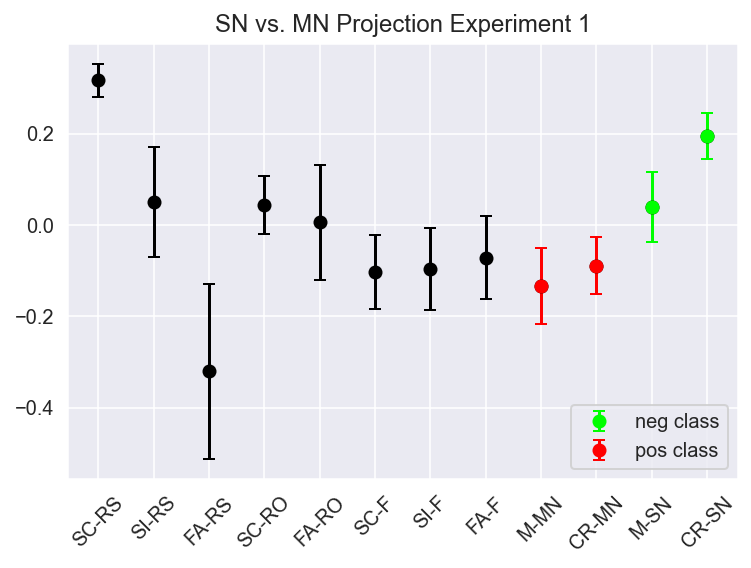

In [21]:
## Projection graph
pos_idx = [10, 11]
neg_idx = [8, 9]
data_preproc.generate_projections(LDA, pos_idx, neg_idx, X, y, subject)
plt.title("SN vs. MN Projection Experiment 1", fontsize = 12)

In [22]:
## experiement 2
file_path = "data_CRM_SN_vs_MN_imbalLDA_order_proj_2.mat"
data_preproc = preproc(file_path, 2)
pos1, neg1 = data_preproc.filter_index(2,5,2,4)
pos2, neg2 = data_preproc.filter_index(4,5,4,4)
pos_idx, neg_idx = data_preproc.merge_two_class(pos1, neg1, pos2, neg2)
X, y, subject = data_preproc.get_data_by_index(pos_idx, neg_idx)
X.shape

(2802, 72)

In [28]:
## use shrinkage 0 to fit the whole data and test on the whole data
## different solvers give the same result
LDA = LinearDiscriminantAnalysis(shrinkage = 0, solver = 'eigen')
LDA.fit(X, y)
print("the accuracy for experiment 2 SN vs. MN is " + str(LDA.score(X, y)))

the accuracy for experiment 2 SN vs. MN is 0.6745182012847966


In [24]:
## prediction arrays 
predicted_labels = LDA.predict(X)
predicted_labels

array([ 1.,  1.,  1., ..., -1., -1., -1.])

In [29]:
## AUROC
auroc = roc_auc_score(y, predicted_labels)
print("The auroc for experiment 2 SN vs. MN is " + str(auroc))

The auroc for experiment 2 SN vs. MN is 0.6147504892367905


Text(0.5, 1.0, 'SN vs. MN Projection Experiment 2')

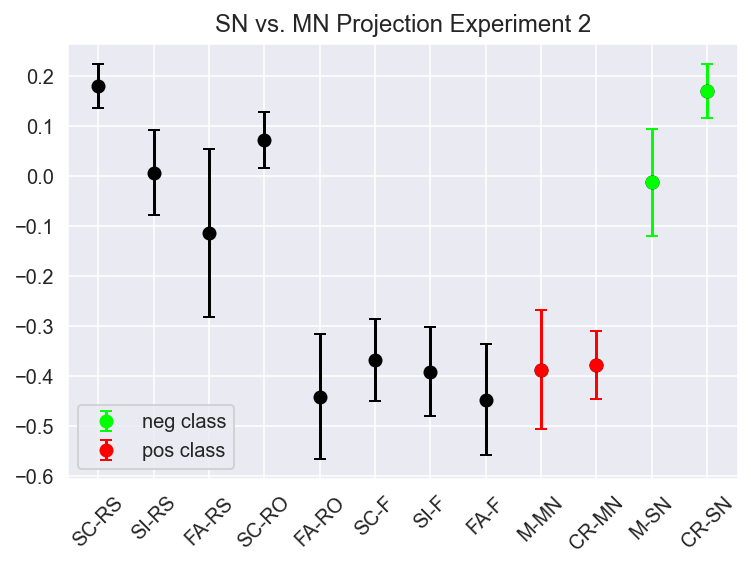

In [27]:
## Projection graph
pos_idx = [10, 11]
neg_idx = [8, 9]
data_preproc.generate_projections(LDA, pos_idx, neg_idx, X, y, subject)
plt.title("SN vs. MN Projection Experiment 2", fontsize = 12)

# training F vs. CR whole dataset


In [35]:
## experiement 1
file_path = 'data_F_vs_CR_imbalLDA_order_proj_1.mat'
data_preproc = preproc(file_path, 1)
pos1, neg1 = data_preproc.filter_index(1,3,2,4)
pos2, neg2 = data_preproc.filter_index(3,3,2,5)
pos_idx, neg_idx = data_preproc.merge_two_class(pos1, neg1, pos2, neg2)
X, y, subject = data_preproc.get_data_by_index(pos_idx, neg_idx)
X.shape

(3586, 72)

In [31]:
## use shrinkage 0 to fit the whole data and test on the whole data
## different solvers give the same result
LDA = LinearDiscriminantAnalysis(shrinkage = 0, solver = 'eigen')
LDA.fit(X, y)
print("the accuracy for experiment 1 F vs. CR is " + str(LDA.score(X, y)))

the accuracy for experiment 1 F vs. CR is 0.7035694366982711


In [32]:
## prediction arrays 
predicted_labels = LDA.predict(X)
predicted_labels

array([-1., -1., -1., ..., -1., -1., -1.])

In [33]:
## AUROC
auroc = roc_auc_score(y, predicted_labels)
print("The auroc for experiment 1 F vs. CR is " + str(auroc))

The auroc for experiment 1 F vs. CR is 0.5399111697271719


Text(0.5, 1.0, 'F vs. CR Projection Experiment 1')

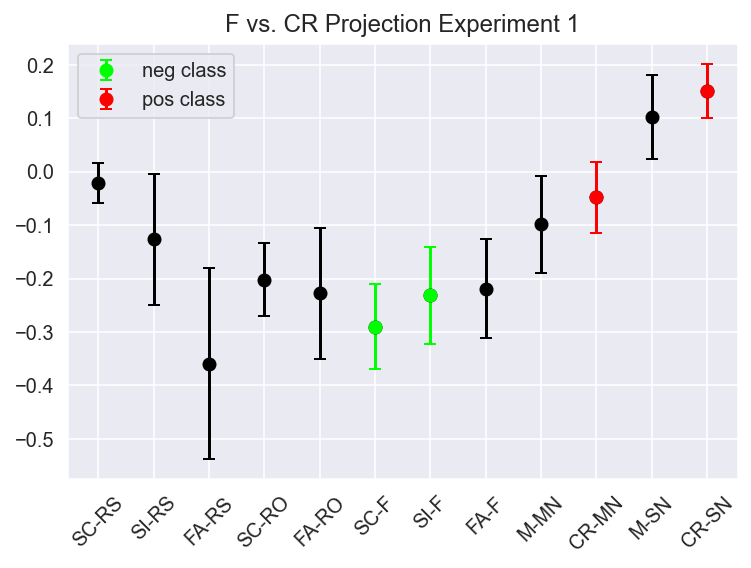

In [34]:
## Projection graph
pos_idx = [5, 6]
neg_idx = [9, 11]
data_preproc.generate_projections(LDA, pos_idx, neg_idx, X, y, subject)
plt.title("F vs. CR Projection Experiment 1", fontsize = 12)

In [36]:
## experiement 2
file_path ='data_F_vs_CR_imbalLDA_order_proj_2.mat'
data_preproc = preproc(file_path, 2)
pos1, neg1 = data_preproc.filter_index(1,3,2,4)
pos2, neg2 = data_preproc.filter_index(3,3,2,5)
pos_idx, neg_idx = data_preproc.merge_two_class(pos1, neg1, pos2, neg2)
X, y, subject = data_preproc.get_data_by_index(pos_idx, neg_idx)
X.shape

(2909, 72)

In [37]:
## use shrinkage 0 to fit the whole data and test on the whole data
## different solvers give the same result
LDA = LinearDiscriminantAnalysis(shrinkage = 0, solver = 'eigen')
LDA.fit(X, y)
print("the accuracy for experiment 2 F vs. CR is " + str(LDA.score(X, y)))

the accuracy for experiment 2 F vs. CR is 0.7112409762805088


In [38]:
## prediction arrays 
predicted_labels = LDA.predict(X)
predicted_labels

array([-1., -1., -1., ..., -1., -1., -1.])

In [39]:
## AUROC
auroc = roc_auc_score(y, predicted_labels)
print("The auroc for experiment 2 F vs. CR is " + str(auroc))

The auroc for experiment 2 F vs. CR is 0.538458651490648


Text(0.5, 1.0, 'F vs. CR Projection Experiment 2')

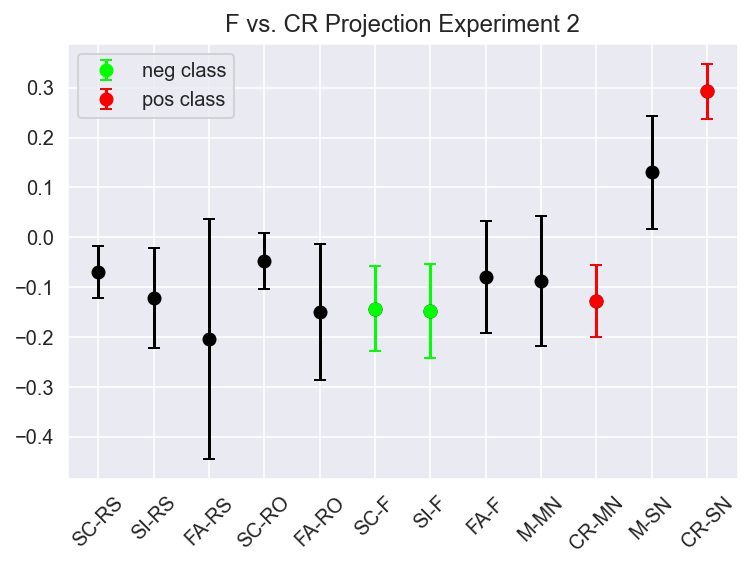

In [40]:
## Projection graph
pos_idx = [5, 6]
neg_idx = [9, 11]
data_preproc.generate_projections(LDA, pos_idx, neg_idx, X, y, subject)
plt.title("F vs. CR Projection Experiment 2", fontsize = 12)